# Regresión Multiple

* Sales ~ TV
* Sales ~ Newspaper
* Sales ~ Radio
* Sales ~ TV + Newspaper
* Sales ~ TV + Radio
* Sales ~ Newspaper + Radio
* Sales ~ TV + Newspaper + Radio

La cantidad de modelos lineales posibles de obtener estará en función del número de variables predictoras $(k)$:

\begin{align*}
No. Modelos=2^k-1
\end{align*}

La forma óptima para filtrar los modelos es empezar con el modelo lineal que utilice todas las variables predictoras. Posteriormente eliminar las variables que tengan $p$ values altos y mantener aquellas que se encuentren por debajo de 0.05.

En el modelo de regresión múltiple es importante tener presente el valor de $R^2$ ajustado y no el $R^2$ simple.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Datasets\Advertising.csv")

In [3]:
df.drop(df.columns[0],axis=1, inplace=True)

In [4]:
df[:5]

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Para el análisis de regresión múltiple, será necesario importar la librería **statsmodel**

In [5]:
import statsmodels.formula.api as smf

In [6]:
lm2=smf.ols(formula="Sales~TV+Newspaper", data=df).fit()

In [7]:
lm2.params

Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

In [8]:
lm2.pvalues

Intercept    3.145860e-22
TV           5.507584e-44
Newspaper    2.217084e-05
dtype: float64

\begin{align*}
Sales=5.775+0.047TV+0.04422News
\end{align*}

In [9]:
lm2.rsquared

0.6458354938293271

In [10]:
lm2.rsquared_adj

0.6422399150864777

In [11]:
sales_pred=lm2.predict(df[["TV","Newspaper"]])

In [12]:
sales_pred[:5]

0    19.626901
1     9.856348
2     9.646055
3    15.467318
4    16.837102
dtype: float64

\begin{align*}
SSD=\sum{(y_i-y_r)^2}
\end{align*}

In [13]:
SSD=sum((df.Sales-sales_pred)**2)

In [14]:
SSD

1918.5618118968275

\begin{align*}
RSE=\sqrt{\frac{SSD}{n-k-1}}
\end{align*}

In [15]:
RSE=np.sqrt(SSD/(len(df)-3))

In [16]:
RSE

3.1207198602528856

\begin{align*}
error=\frac{RSE}{\bar{y}}
\end{align*}

In [17]:
# Porcentaje que deja de explicar el modelo
error=RSE/np.mean(df.Sales)
error

0.2225508903728212

In [18]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           3.95e-45
Time:                        18:45:48   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
Newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
lm3=smf.ols(formula="Sales~TV+Radio", data=df).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           4.83e-98
Time:                        18:45:49   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
sales_pred=lm3.predict(df[["TV","Radio"]])
SSD=sum((df.Sales-sales_pred)**2)
RSE=np.sqrt(SSD/(len(df)-3))
error=RSE/np.mean(df.Sales)

print("La suma de los cuadrados de la desviación es:",SSD)
print("La raíz cuadrada de los errores es:",RSE)
print("El porcentaje de error promedio es:",round(error*100,2),"%")

La suma de los cuadrados de la desviación es: 556.9139800676185
La raíz cuadrada de los errores es: 1.6813609125080011
El porcentaje de error promedio es: 11.99 %


In [21]:
lm4=smf.ols(formula="Sales~TV+Radio+Newspaper", data=df).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.58e-96
Time:                        18:45:49   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Multicolinealidad

Correlación entre las variables predictoras

In [22]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


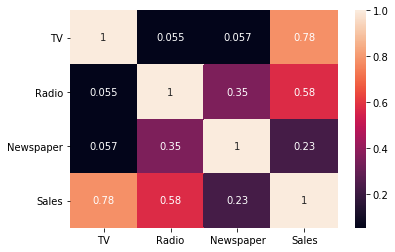

In [24]:
sns.heatmap(df.corr(), annot=True)
plt.show()

### Prueba de multicolinealidad.

Newspaper ~ TV + Radio ->R^2 -> VIF=1/(1-R^2)

* Si VIF=1, Las variables no están relacionadas

* Si VIF=(1,5), Las variables están relacionadas de forma moderada, y aún pueden formar parte del modelo

* Si VIF=(>5), Las variables están altamente relacionadas y deberán ser eliminadas del modelo


In [26]:
# Newspaper~TV+Radio

lm_n=smf.ols(formula="Newspaper~TV+Radio", data=df).fit()
rsquared_n=lm_n.rsquared
VIF=1/(1-rsquared_n)
VIF

1.1451873787239286

In [28]:
# TV~Newspaper+Radio

lm_tv=smf.ols(formula="TV~Newspaper+Radio", data=df).fit()
rsquared_tv=lm_tv.rsquared
VIF=1/(1-rsquared_tv)
VIF

1.0046107849396502

In [29]:
# Radio~Newspaper+TV

lm_r=smf.ols(formula="Radio~Newspaper+TV", data=df).fit()
rsquared_r=lm_r.rsquared
VIF=1/(1-rsquared_r)
VIF

1.1449519171055353

## Validando el modelo

In [30]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [31]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [40]:
tele=147.0425+85.85*np.random.randn(30)
tele

array([245.285585  , 251.35565046, 247.01415746,  86.19341794,
        15.01049569,  51.93234548, -25.83345183,  98.70366143,
       235.25563091, 211.61969496, 224.20395128,  -8.18443481,
        51.03740975,  92.70441492, 211.0149862 , 181.14529967,
       175.46871685,  67.72374735, 317.63775018,  70.13287774,
       121.36611046, 192.95037193, 154.90793605, 289.87095947,
       133.81033523, 188.00142935,  22.81736549, 224.73826259,
       135.63870555, 237.49606766])

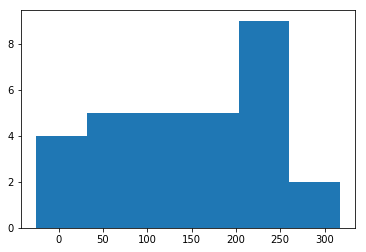

In [66]:
plt.hist(tele, bins=6)
plt.show()

In [39]:
rad=tele=23.264+14.85*np.random.randn(30)
rad

(array([ 3.,  6.,  4., 11.,  2.,  4.]),
 array([ 1.8469368 ,  9.59588416, 17.34483151, 25.09377887, 32.84272623,
        40.59167359, 48.34062094]),
 <a list of 6 Patch objects>)

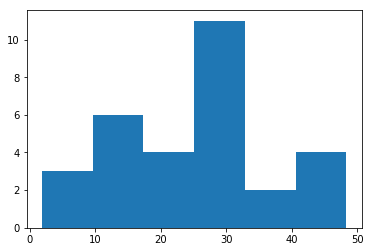

In [64]:
plt.hist(rad, bins=6)

In [49]:
test=pd.DataFrame({"TV":tele,"Radio":rad})

In [50]:
lm_test=smf.ols(formula="Sales~TV+Radio", data=df).fit()
lm_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           4.83e-98
Time:                        20:13:55   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
sales_test=lm_test.predict(test[["TV","Radio"]])

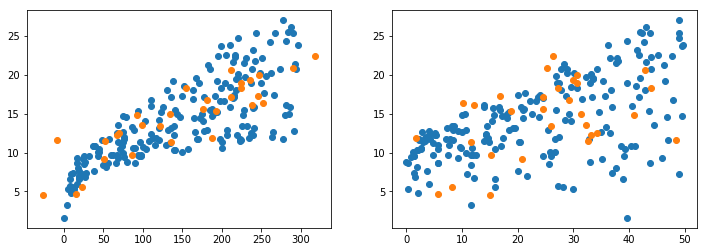

In [61]:
fig, axes = plt.subplots(1,2, figsize = (12,4))
axes[0].scatter(df.TV,df.Sales)
axes[0].scatter(test.TV,sales_test)
axes[1].scatter(df.Radio,df.Sales)
axes[1].scatter(test.Radio,sales_test)
plt.show()

## Resumen

<table>
  <tr>
    <th>Nombre</th>
    <th>Definición</th>
    <th> $R^2$ </th>
    <th> $R^2$ Ajustado </th>
    <th>Estadístico F</th>
    <th> $p$-value </th>
    <th> $RSE$ </th>
    <th> Error </th>
  </tr>
  <tr>
    <td>1</td>
    <td>Sales~TV</td>
    <td>0.612</td>
    <td>0.610</td>
    <td>312.1</td>
    <td>1.47E-42</td>
    <td>3.25</td>
    <td>23%</td>
  </tr>
  <tr>
    <td>2</td>
    <td>Sales~TV+Newspaper</td>
    <td>0.646</td>
    <td>0.642</td>
    <td>179.6</td>
    <td>3.95E-45</td>
    <td>3.12</td>
    <td>22%</td>
  </tr>
  <tr>
    <td>3</td>
    <td>Sales~TV+Radio</td>
    <td>0.897</td>
    <td>0.896</td>
    <td>859.6</td>
    <td>4.83E-98</td>
    <td>1.68</td>
    <td>11%</td>
  </tr>
  <tr>
    <td>4</td>
    <td>Sales~TV+Radio+Newspaper</td>
    <td>0.897</td>
    <td>0.896</td>
    <td>570.3</td>
    <td>1.58E-96</td>
    <td>1.69</td>
    <td>12%</td>
  </tr>
</table>